<a href="https://colab.research.google.com/github/TDMDegree/Level-4-Introduction-to-AI-and-ML/blob/main/Consolidation_Seminar%20_clustering_tutorial_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this analysis, we aim to identify different types of wine in a dataset based on its features using two clustering machine learning algorithms: K-Means and DBSCAN. K-Means is a centroid-based algorithm that requires specifying the number of clusters (k).DBSCAN is a density-based algorithm that does not require the number of clusters to be specified.By employing both algorithms, we can compare their performance and gain a comprehensive understanding of the different types of wine in the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before applying our clustering algorithms, we will perform basic data exploration on our wine dataset. This involves examining the dataset to understand its structure, features, and any potential anomalies. We'll start by loading the dataset and inspecting the first few rows to get a sense of the data. Then, we'll check for any missing values and handle them appropriately. We will also explore summary statistics for each feature, such as mean, median, and standard deviation, to understand the distribution of the data. Additionally, visualizations such as histograms, heatmap and scatter plots will be used to identify patterns, correlations, and potential outliers. This initial exploration will provide crucial insights and guide our preprocessing steps, ensuring our clustering algorithms can perform effectively.

In [ ]:
# Task 1 - load the dataset and display the first 5 records
df = pd.read_csv("wine-clustering.csv")
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Our first tasks is to understand the columns, their datatypes and the total number of records in the dataset.

In [ ]:
# Task 2 - find out the datatype, record number and column name for dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


Our next task is to check to see if we have any null values in our dataset.

In [ ]:
# Task 3 - check to see if there are null values in any of the columns
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Our next task is to understand some of the basic statistics such as the mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum value. This should give us a basic understanding of whether we might have any outliers or if we need to scale or normalise the data.

In [ ]:
# Task 4 - Show the basic statistics such as the mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum value
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Based on the features' mean and standard deviation, I have decided to scale the data. Additionally, based on the mean, maximum, and minimum values, I won't be conducting any outlier analysis (although the Proline maximum value does look high).

If you were doing this analysis as part of your assignment, I would expect a more in-depth analysis for these decisions.


Our next tasks is to drop and duplicate records and see if any changes have happened to the dataframe.

In [ ]:
#Task 5 - Drop the duplications and see if any changes have happened within the dataframe.
df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


We are going to examine the feature selection. We are going to start by examining the correlation of each of the features.

Understanding the correlation of different features is important in a clustering task with K-Means or DBSCAN for several reasons:

Redundancy Reduction

  Highly correlated features may provide redundant information. If two or more features are strongly correlated, they essentially contribute similar information to the clustering process. This redundancy can distort the clustering results, particularly in K-Means, which relies on distance calculations. Identifying and possibly removing or combining such features can lead to more efficient and meaningful clustering.


Improved Clustering Performance:

  Features that are strongly correlated with others might dominate the clustering process, especially in K-Means, where the algorithm tries to minimise the distance between points and centroids. Understanding these correlations allows you to balance the feature importance, ensuring that no single feature disproportionately influences the clustering outcome.

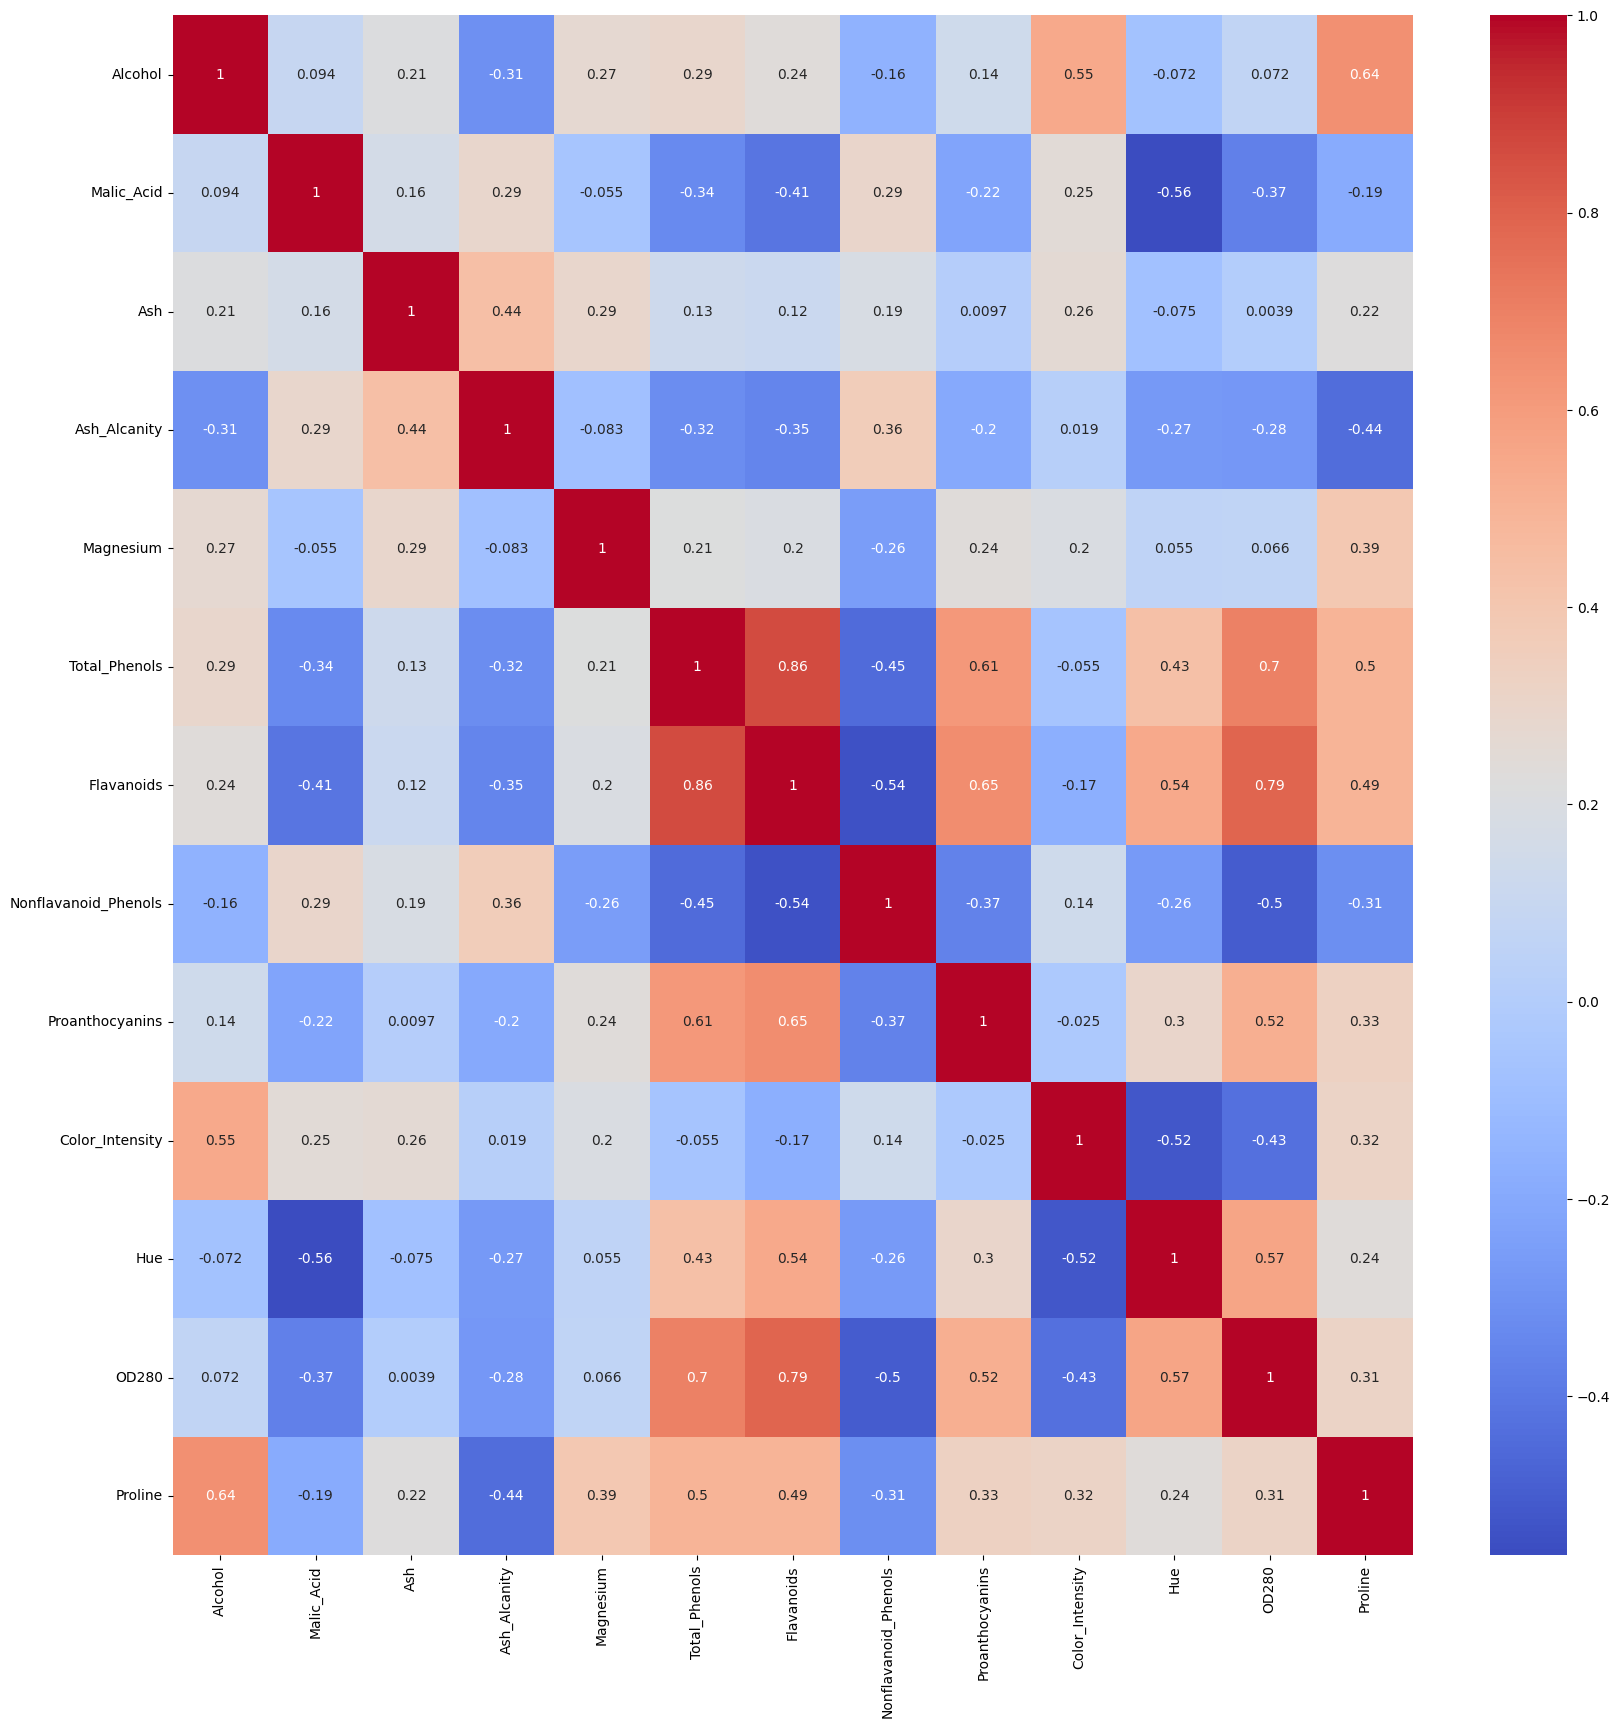

In [ ]:
# Task 6 - Create a graph or table that shows the correlations between the features.
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")
plt.show()

When considering redundancy reduction or dimensionality reduction based on feature correlations, a common rule of thumb is to start considering action when the correlation coefficient between two features exceeds a certain threshold. Below is my threshold.For your report, I would expect a rationale for a decision like this based on your independent reading.

    High Correlation (≥ 0.7)
    Moderate Correlation (0.5 ≤ |r| < 0.7)
    Low Correlation (< 0.5)

Based on this, I can either do feature selection or PCA. In this analysis, I have decided on PCA. PCA does not specifically select or exclude individual features but instead creates new composite features (principal components). For your report, I would expect a rationale for a decision like this based on your independent reading.


In [ ]:
# Task 7 - Create a scaler and apply it to the dataframe.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = df.columns

# Apply scaler to selected columns and replace them in the DataFrame
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


I am now going to do dimensionality reduction and merge the features into a 2 feature dataframe. I have selected 2 components because it is easier to plot it onto a scatter graph. If you were to select this technique, you should be thinking about the number of components you wish to reduce it to and why. This should be supported via literature.

In [ ]:
#Task 8 - implement the PCA to the dataframe and the plot it on a scatter graph
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])
df.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


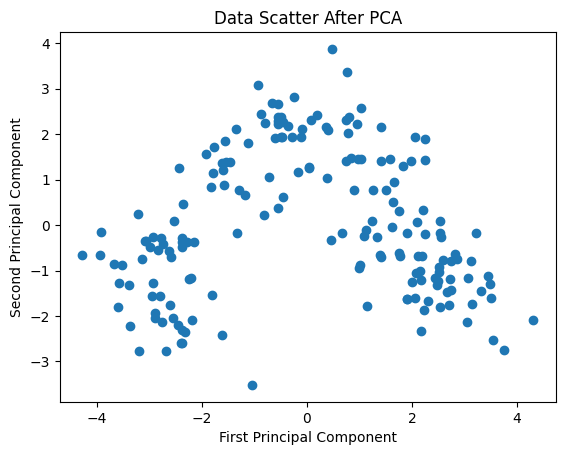

In [ ]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Data Scatter After PCA")
plt.show()

I am now going to use the elbow method to find the best cluster range for the Kmeans model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

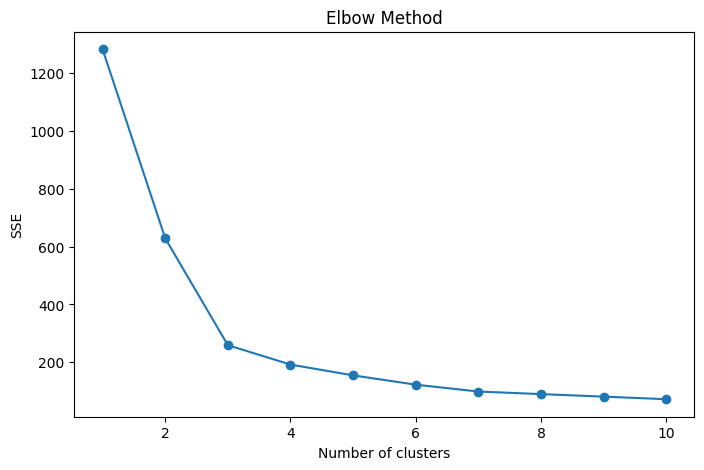

In [ ]:

from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

From the Elbow method, 3 is the ideal K number . This statement should be supported literature.

In [ ]:
# Task  9 - create a Kmean model based on 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


With a 2 feature dataframe, we can easily see the cluster on a scatter plot.

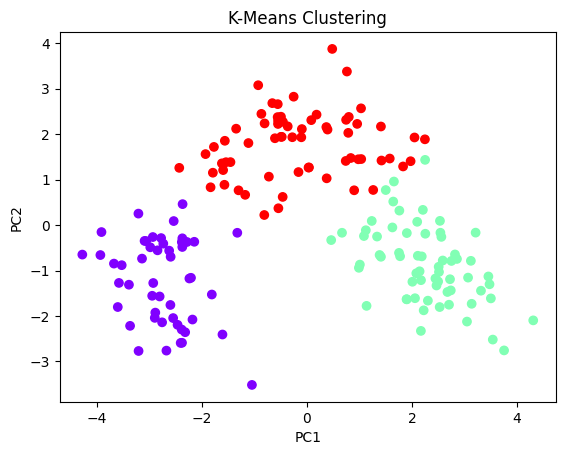

In [ ]:
# Task 10 - show the clusters on a scatter graph

plt.scatter(df['PC1'], df['PC2'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

I am now going to compare this with the DBSCAN model

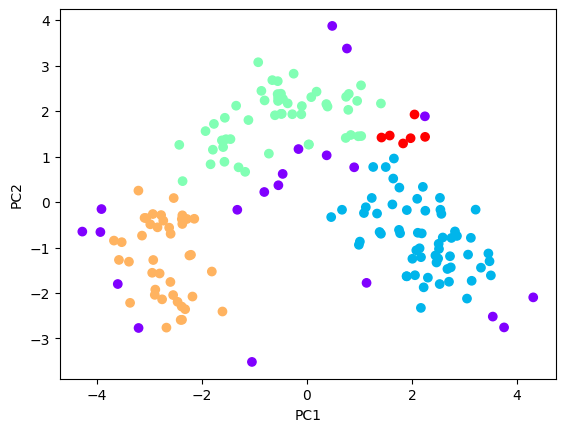

In [ ]:
# Task 11 - create your DBSCAN model and plot it on a scatter graph.
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.7, min_samples=10).fit(df)


plt.scatter(df['PC1'], df['PC2'], c = db.labels_, cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



The DBSCAN shows 5 clusters. You now need to evaluate which clustering model to use. As you don't have any labels, you have to do this based on your knowledge of the two models, their advantages and disadvantages and your understanding of the data.